In [2]:
!pip install xgboost


   -------------------------------------- 125.4/125.4 MB 567.3 kB/s eta 0:00:00


Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17119
           1       0.94      0.58      0.72      1057

    accuracy                           0.97     18176
   macro avg       0.96      0.79      0.85     18176
weighted avg       0.97      0.97      0.97     18176



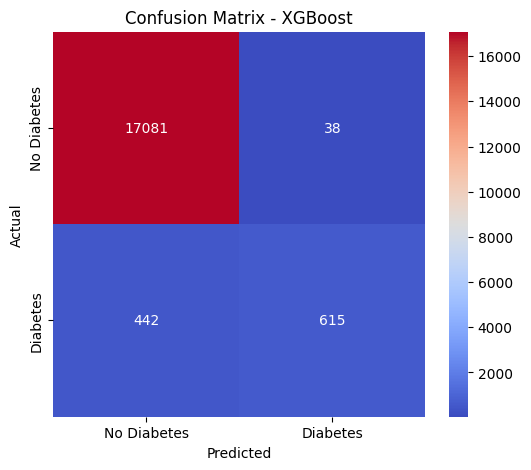

Training LightGBM...
[LightGBM] [Info] Number of positive: 4227, number of negative: 68477
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 72704, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.058140 -> initscore=-2.785005
[LightGBM] [Info] Start training from score -2.785005

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17119
           1       0.96      0.57      0.72      1057

    accuracy                           0.97     18176
   macro avg       0.97      0.79      0.85     18176
weighted avg       0.97      0.97      0.97     18176



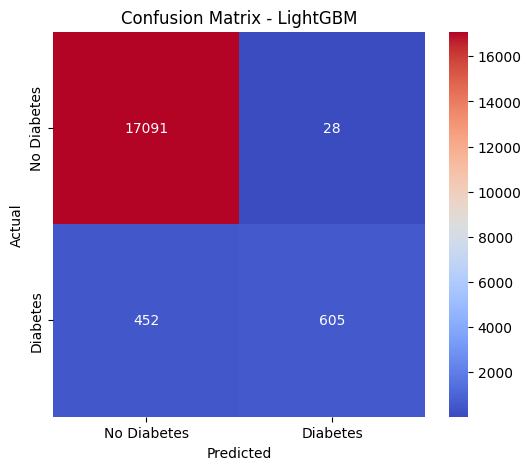

Training Weighted Logistic...

Weighted Logistic - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     17119
           1       0.28      0.88      0.43      1057

    accuracy                           0.86     18176
   macro avg       0.64      0.87      0.68     18176
weighted avg       0.95      0.86      0.89     18176



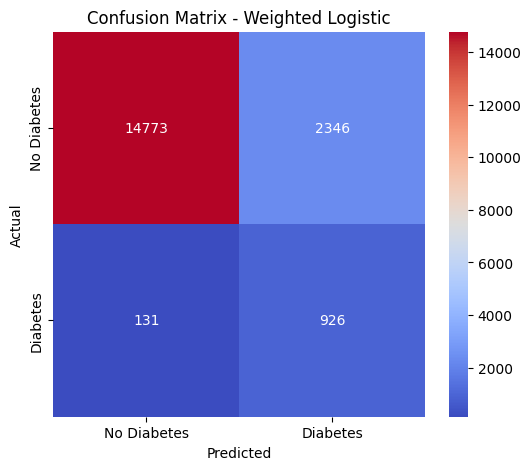

Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17119
           1       0.82      0.47      0.59      1057

    accuracy                           0.96     18176
   macro avg       0.89      0.73      0.79     18176
weighted avg       0.96      0.96      0.96     18176



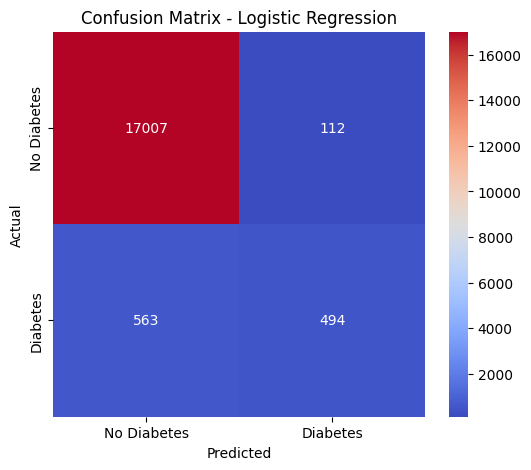

Training Decision Tree...

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     17119
           1       0.60      0.64      0.62      1057

    accuracy                           0.95     18176
   macro avg       0.79      0.81      0.80     18176
weighted avg       0.96      0.95      0.96     18176



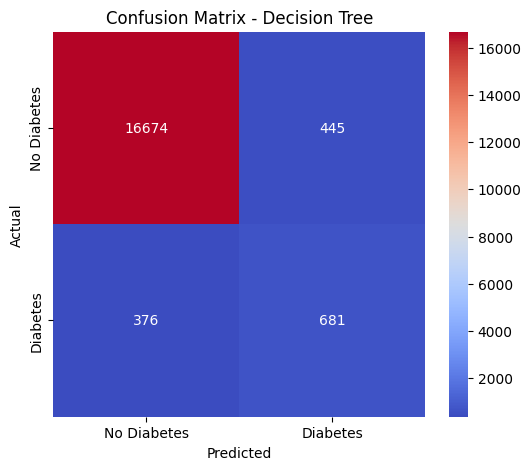

Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17119
           1       0.92      0.57      0.71      1057

    accuracy                           0.97     18176
   macro avg       0.95      0.79      0.85     18176
weighted avg       0.97      0.97      0.97     18176



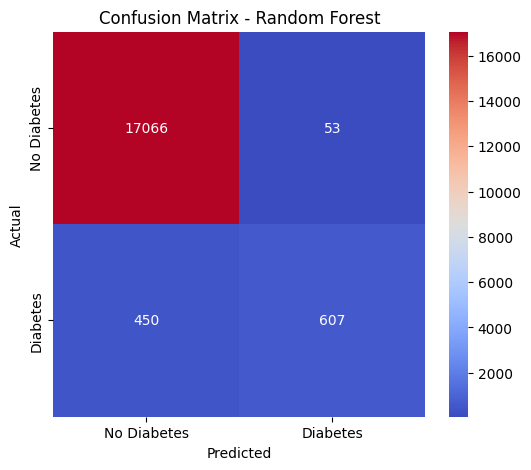

Training Gradient Boosting...

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17119
           1       0.99      0.57      0.72      1057

    accuracy                           0.97     18176
   macro avg       0.98      0.79      0.86     18176
weighted avg       0.98      0.97      0.97     18176



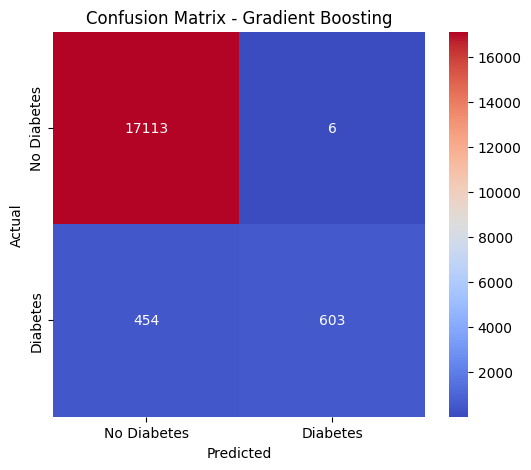

Training KNN...

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17119
           1       0.82      0.46      0.59      1057

    accuracy                           0.96     18176
   macro avg       0.89      0.73      0.78     18176
weighted avg       0.96      0.96      0.96     18176



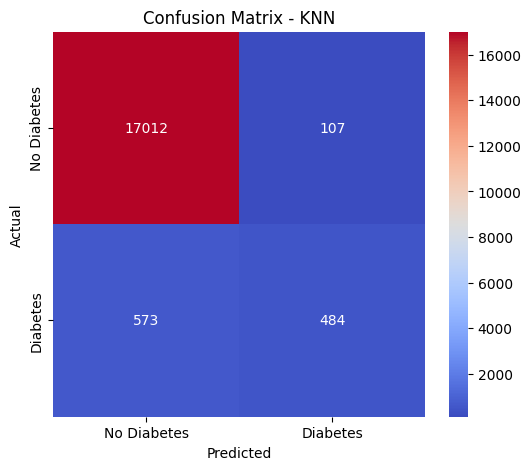

Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36     17119
           1       0.07      1.00      0.14      1057

    accuracy                           0.26     18176
   macro avg       0.54      0.61      0.25     18176
weighted avg       0.95      0.26      0.35     18176



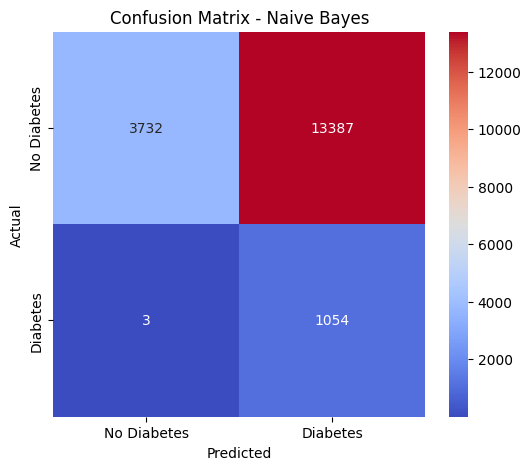

🏆 Best Model: Gradient Boosting with F1-Score: 0.7239
✅ Best model saved successfully!


C:\Users\ghans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


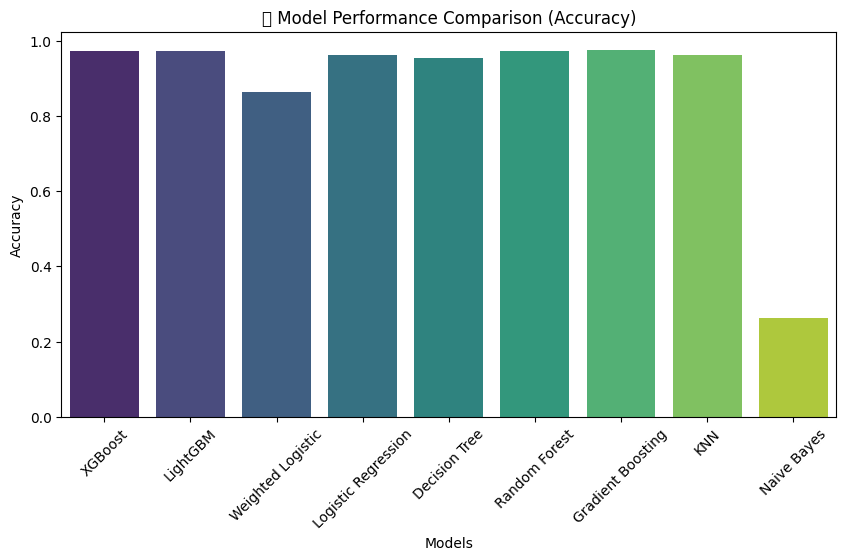

<Figure size 1000x500 with 0 Axes>

C:\Users\ghans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


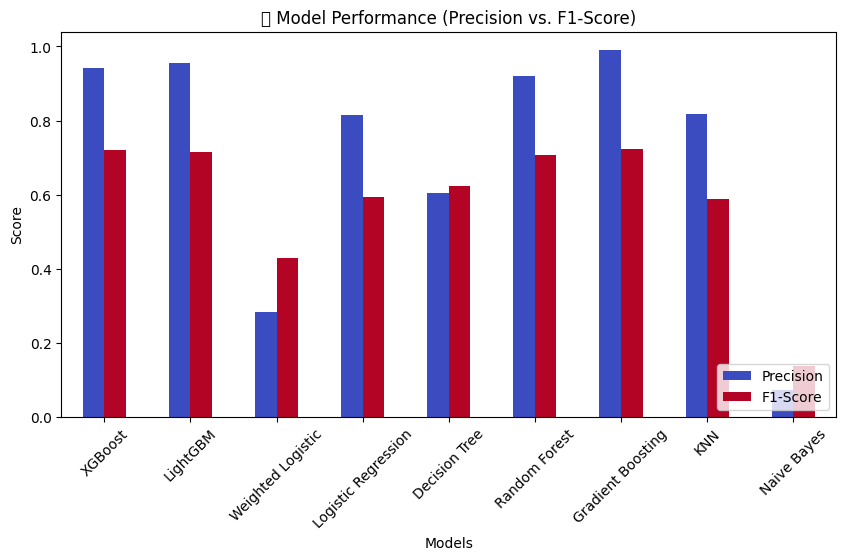

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving the best model
import shutil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load Preprocessed Dataset
df = pd.read_csv("preprocessed_dataset.csv")

# Splitting Data into Features (X) and Target (y)
X = df.drop(columns=["diabetes"])
y = df["diabetes"]

# Convert categorical features (if any) to 'category' dtype
categorical_cols = X.select_dtypes(include=["object"]).columns
X[categorical_cols] = X[categorical_cols].astype("category")

# Splitting into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ML Models
models = {
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "Weighted Logistic": LogisticRegression(class_weight="balanced"),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Training and Evaluating Models
model_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)  # Avoid division-by-zero error
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

    # Print classification report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print("=" * 50)

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(model_results).T

# Identify Best Model Based on F1-Score
best_model_name = results_df["F1-Score"].idxmax()
best_model = models[best_model_name]

# Print Best Model
print(f"🏆 Best Model: {best_model_name} with F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")

# Save the Best Model
joblib.dump(best_model, "best_diabetes_prediction_model.pkl")
print("✅ Best model saved successfully!")

# Plot Model Accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("🔬 Model Performance Comparison (Accuracy)")
plt.show()

# Plot Precision vs. F1-Score
plt.figure(figsize=(10, 5))
results_df[["Precision", "F1-Score"]].plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("🎯 Model Performance (Precision vs. F1-Score)")
plt.legend(loc="lower right")
plt.show()
